In [1]:
#Basic imports
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as cons

#Matrix imports 
from scipy import sparse
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs

In [2]:
#Particle properties
hbar = 1 # We could use cons.hbar.value but value of 1 is standard in analytics
mass = 1 # cons.m_e.value #m also gets standardized to 1 
#This gives us just -1/2
charge = -1 * cons.e.value

#Grid boxed
N = 100 #Increasing does not make too much of a difference
L = 1
#X,Y = np.meshgrid( np.linspace(0, L, N, dtype = float), np.linspace(0, L, N, dtype = float))
X,Y = np.meshgrid( np.linspace(0, L, N, dtype = float), np.linspace(0, L, N, dtype = float))


In [3]:
def potential(x,y):
    return 0*X
#We can change this potential/
V = potential(X,Y)


In [4]:
#Matrix manipulation

#Matrix with ones
diag = np.ones(N)

#Referring back to our D matrix, this creates the 1,-2,1 pattern we see across the diagonal
diags = np.array([diag, -2*diag, diag]) 

#Refer back to our matrix D
#Essentially, the matrix starts with -2 , 1, 0
#In the next line we have 1, -2, 1
#The code below moves the matrix with ones to be pushed down, the matrix with
#-2*diag to be where we start and the other diag matrix to be push to the right
D = sparse.spdiags(diags, np.array([-1, 0, 1]), N, N)

#Here we simply use a function already found, and multiply our constans
#Note again then hbar and mass are denoted to be 1 for simplification
T = -(hbar / 2 * mass) * sparse.kronsum(D,D)

#Here we are reshaping the potential to be one column x N*2
#The zero simply centers it in the matrix
U = sparse.diags(V.reshape(N**2), (0))

#This is simply the hamiltonian 
H = T + U

In [5]:
diags

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [-2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
        -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
        -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
        -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
        -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
        -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2

In [6]:
#Looks for smallest vectors and values where k is the energy states
#This is extracting it from that 1D array where each row is placed into a combined column 
eigenvalues, eigenvectors = eigs(H, k = 10, which = "SM")

In [7]:
eigenvectors

array([[ 1.91525036e-05+0.j, -7.65359172e-05+0.j, -1.15778184e-05+0.j,
        ..., -3.63493559e-05+0.j, -9.84330422e-05+0.j,
        -2.10763439e-05+0.j],
       [ 3.82864784e-05+0.j, -1.52775732e-04+0.j, -2.30509093e-05+0.j,
        ..., -7.28522668e-05+0.j, -1.95734114e-04+0.j,
        -4.27477337e-05+0.j],
       [ 5.73834136e-05+0.j, -2.28424487e-04+0.j, -3.43150081e-05+0.j,
        ..., -1.09659134e-04+0.j, -2.90788368e-04+0.j,
        -6.55991251e-05+0.j],
       ...,
       [ 5.73834136e-05+0.j, -2.28424487e-04+0.j,  3.43150081e-05+0.j,
        ...,  1.09659134e-04+0.j,  2.90788368e-04+0.j,
         6.55991251e-05+0.j],
       [ 3.82864784e-05+0.j, -1.52775732e-04+0.j,  2.30509093e-05+0.j,
        ...,  7.28522668e-05+0.j,  1.95734114e-04+0.j,
         4.27477337e-05+0.j],
       [ 1.91525036e-05+0.j, -7.65359172e-05+0.j,  1.15778184e-05+0.j,
        ...,  3.63493559e-05+0.j,  9.84330422e-05+0.j,
         2.10763439e-05+0.j]])

In [8]:
eigenvalues

array([0.00096744+0.j, 0.00386881+0.j, 0.00241812+0.j, 0.00241812+0.j,
       0.00483437+0.j, 0.00483437+0.j, 0.00628505+0.j, 0.00628505+0.j,
       0.00821385+0.j, 0.00821385+0.j])

In [9]:
def eigenvector(n):
    return eigenvectors.T[n].reshape(N,N)
#n are reffered to as the state levels that we are used to

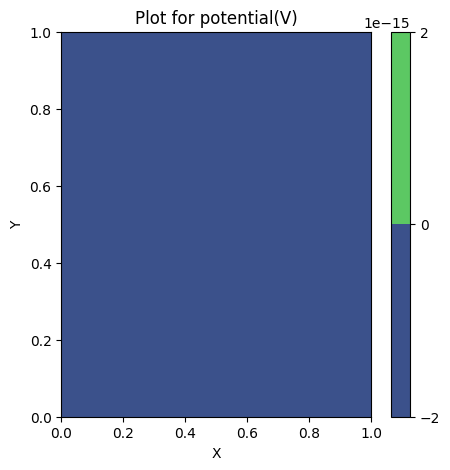

In [10]:
#Plot for potential
plt.figure( figsize = (5,5))
plt.title("Plot for potential(V)")
plt.xlabel("X")
plt.ylabel("Y")
plt.contourf(X,Y,V,100)
plt.colorbar()
plt.show()

C:\Users\etho0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\contour.py:1568: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
C:\Users\etho0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\contour.py:1569: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
C:\Users\etho0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


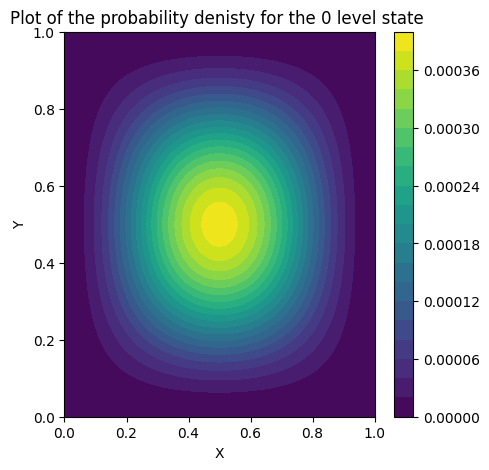

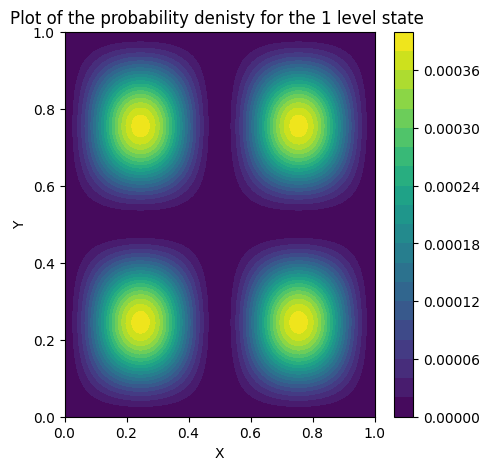

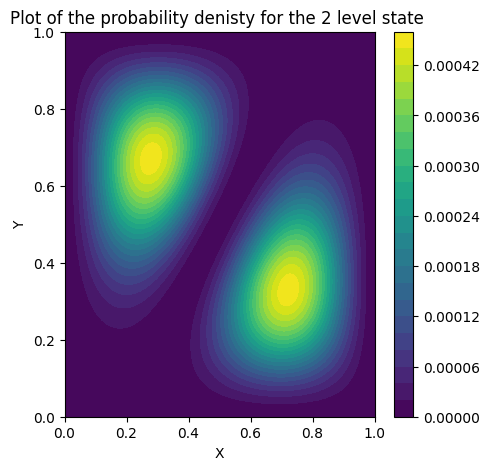

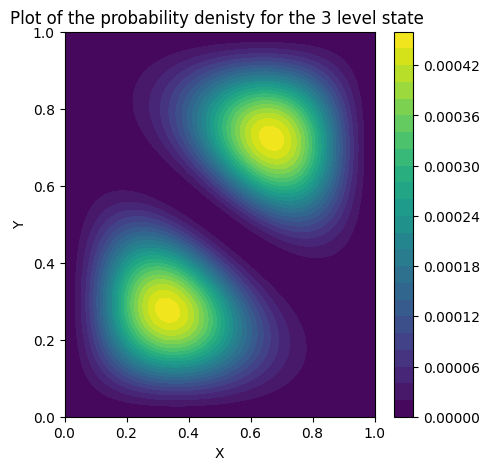

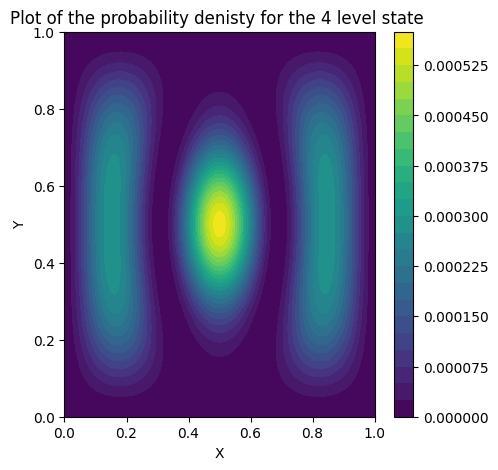

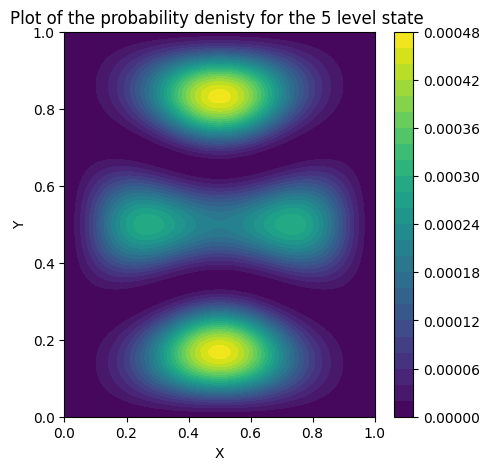

In [11]:
#This section plots the probability density

for w in range(6):
    plt.figure( figsize=(5,5))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Plot of the probability denisty for the {w} level state ")
    plt.contourf(X,Y,eigenvector(w)**2,25)
    plt.colorbar()
    plt.show()

#plt.contourf(X,Y,eigenvector(0)**2,20)
#plt.contourf(X,Y,eigenvector(1)**2,20)
#plt.contourf(X,Y,eigenvector(2)**2,20)
#plt.show()

C:\Users\etho0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\etho0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


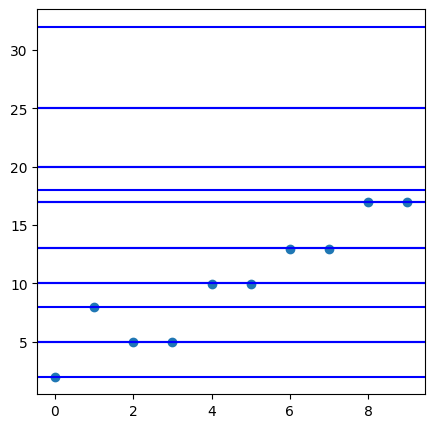

In [12]:
#This section is for the energy levels
alpha = eigenvalues[0]/2 #We are using the ground state
E_div_alpha = eigenvalues/alpha # normalizing the enegry levels
_ = np.arange(0, len(eigenvalues), 1)
plt.figure(figsize=(5,5))
plt.scatter(_, E_div_alpha)

#Theorethical lines for energy levels
[plt.axhline(nx**2+ny**2,color = 'b') for nx in range (1,5) for ny in range (1,5)]
plt.show()

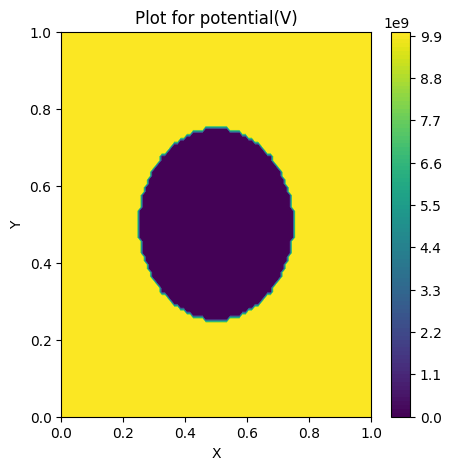

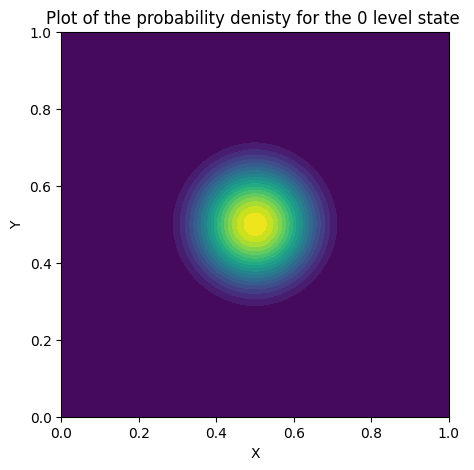

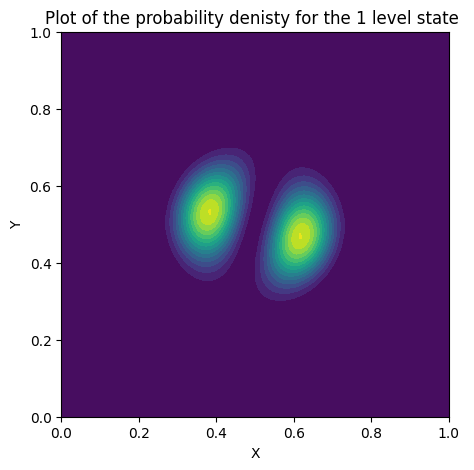

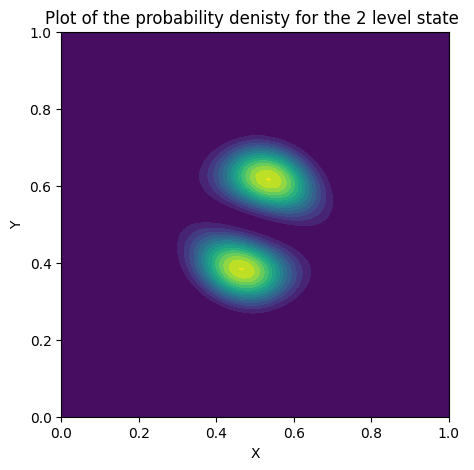

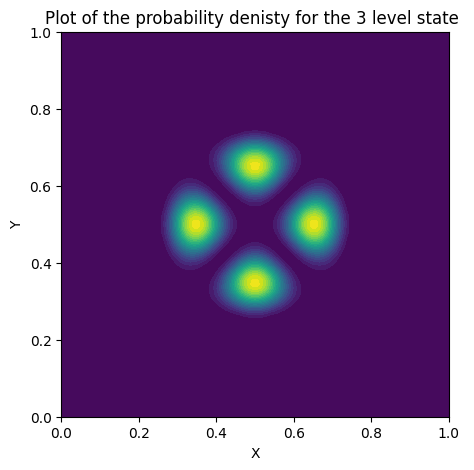

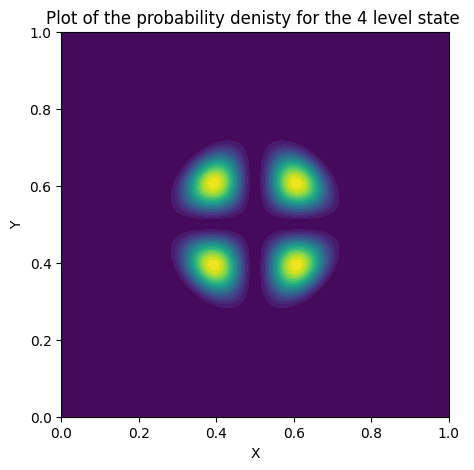

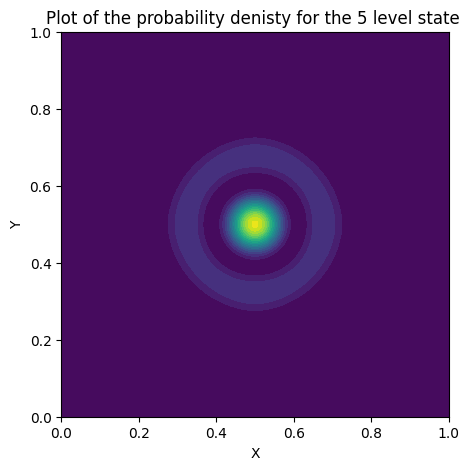

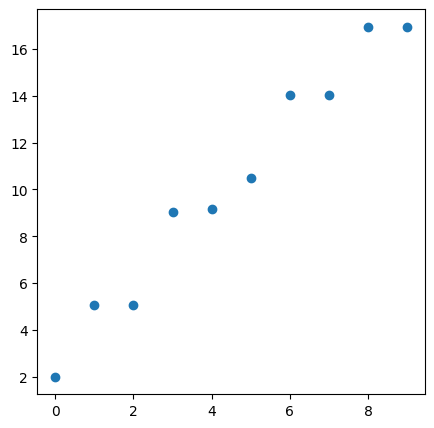

In [19]:
#For circular well
def potential_circular(x,y,r):
    V = np.zeros_like(x)
    outside_circle = np.sqrt((x-L/2)**2 + (y-L/2)**2) > r
    V[outside_circle] = 1e10
    return V
V_c = potential_circular(X,Y,0.25)

U_c = sparse.diags(V_c.reshape(N**2),(0))
H_c = T + U_c

eigenvalues_c, eigenvectors_c = eigs(H_c, k = 10, which = "SM")

def eigenvector_c(n):
    return eigenvectors_c.T[n].reshape(N,N)

#Plot for potential
plt.figure( figsize = (5,5))
plt.title("Plot for potential(V)")
plt.xlabel("X")
plt.ylabel("Y")
plt.contourf(X,Y,V_c,100)
plt.colorbar()
plt.show()

#Plot of probability denisty
for w in range(6):
    plt.figure( figsize=(5,5))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Plot of the probability denisty for the {w} level state ")
    plt.contourf(X,Y,eigenvector_c(w)**2,20)
    plt.show()

#Plot of energy levels
alpha_c = eigenvalues_c[0]/2
E_div_alpha_c = eigenvalues_c/alpha_c
_ = np.arange(0, len(eigenvalues_c), 1)
plt.figure(figsize=(5,5))
plt.scatter(_, E_div_alpha_c)
plt.show()

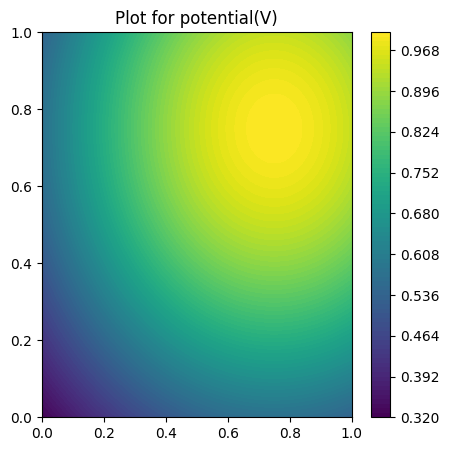

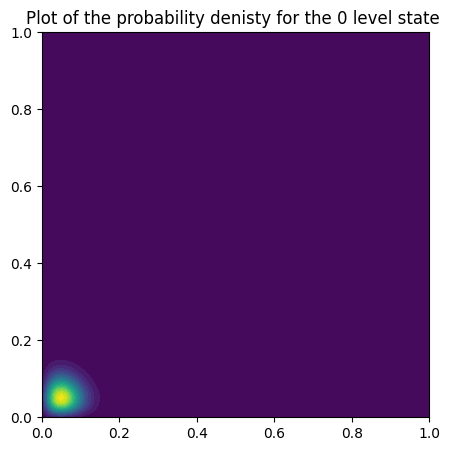

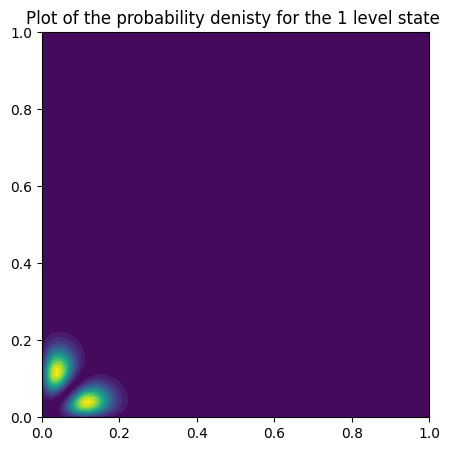

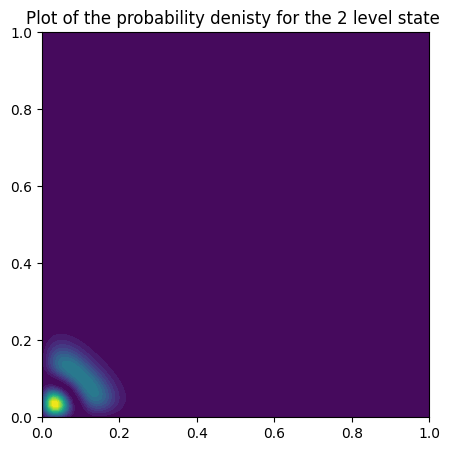

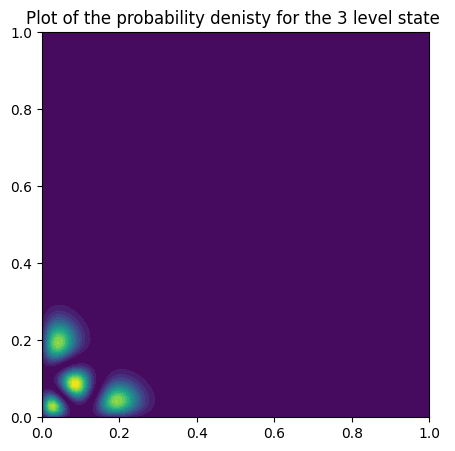

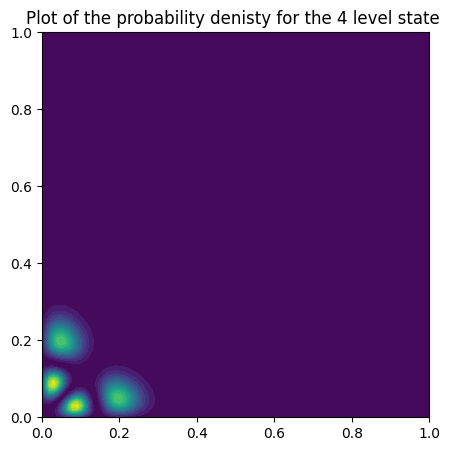

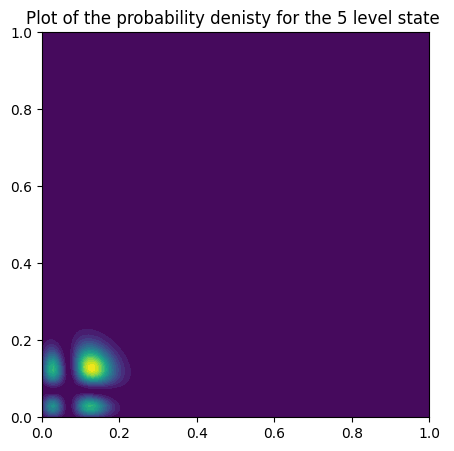

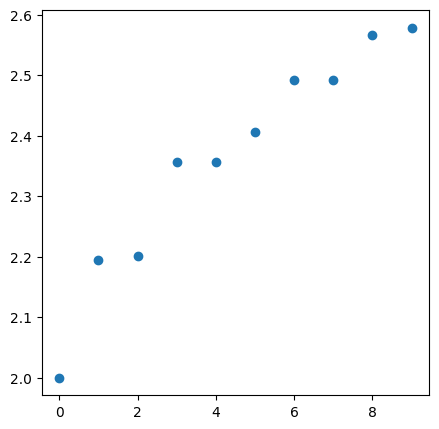

In [18]:
#For gaussian potential
def potential_gaussian(x,y):
    return np.exp(-(x  - 0.75) **2) * np.exp(- (y - 0.75)**2)
V_g = potential_gaussian(X,Y)

U2 = sparse.diags(V_g.reshape(N**2),(0))
H2 = T + U2

eigenvalues_g, eigenvectors_g = eigs(H2, k = 10, which = "SM")

def eigenvector_G(n):
    return eigenvectors_g.T[n].reshape(N,N)

#Plot for potential
plt.figure( figsize = (5,5))
plt.title("Plot for potential(V)")
plt.contourf(X,Y,V_g,100)
plt.colorbar()
plt.show()

#Plot of probability denisty
for w in range(6):
    plt.figure( figsize=(5,5))
    plt.title(f"Plot of the probability denisty for the {w} level state ")
    plt.contourf(X,Y,eigenvector_G(w)**2,20)
    plt.show()

#Plot of energy levels
alpha2 = eigenvalues_g[0]/2
E_div_alpha2 = eigenvalues_g/alpha2
_ = np.arange(0, len(eigenvalues_g), 1)
plt.figure(figsize=(5,5))
plt.scatter(_, E_div_alpha2)
plt.show()
